<h1>Содержание<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Обзор-данных" data-toc-modified-id="Обзор-данных-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Обзор данных</a></span><ul class="toc-item"><li><span><a href="#Вывод" data-toc-modified-id="Вывод-1.1"><span class="toc-item-num">1.1&nbsp;&nbsp;</span>Вывод</a></span></li></ul></li><li><span><a href="#Анализ-данных" data-toc-modified-id="Анализ-данных-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Анализ данных</a></span><ul class="toc-item"><li><span><a href="#Проанализируем-данные-разбив-их-на:-тренд,-сезонность-и-шум." data-toc-modified-id="Проанализируем-данные-разбив-их-на:-тренд,-сезонность-и-шум.-2.1"><span class="toc-item-num">2.1&nbsp;&nbsp;</span>Проанализируем данные разбив их на: тренд, сезонность и шум.</a></span></li><li><span><a href="#Выполним-расширенный-тест-Дики-Фуллера" data-toc-modified-id="Выполним-расширенный-тест-Дики-Фуллера-2.2"><span class="toc-item-num">2.2&nbsp;&nbsp;</span>Выполним расширенный тест Дики-Фуллера</a></span></li><li><span><a href="#Вывод" data-toc-modified-id="Вывод-2.3"><span class="toc-item-num">2.3&nbsp;&nbsp;</span>Вывод</a></span></li></ul></li><li><span><a href="#Предобработка-данных" data-toc-modified-id="Предобработка-данных-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Предобработка данных</a></span><ul class="toc-item"><li><span><a href="#Вывод:" data-toc-modified-id="Вывод:-3.1"><span class="toc-item-num">3.1&nbsp;&nbsp;</span>Вывод:</a></span></li></ul></li><li><span><a href="#Построение-моделей-обучения" data-toc-modified-id="Построение-моделей-обучения-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Построение моделей обучения</a></span><ul class="toc-item"><li><span><a href="#LinearRegression" data-toc-modified-id="LinearRegression-4.1"><span class="toc-item-num">4.1&nbsp;&nbsp;</span>LinearRegression</a></span></li><li><span><a href="#LGBMRegressor" data-toc-modified-id="LGBMRegressor-4.2"><span class="toc-item-num">4.2&nbsp;&nbsp;</span>LGBMRegressor</a></span></li><li><span><a href="#CatboostRegressor" data-toc-modified-id="CatboostRegressor-4.3"><span class="toc-item-num">4.3&nbsp;&nbsp;</span>CatboostRegressor</a></span></li><li><span><a href="#Вывод:" data-toc-modified-id="Вывод:-4.4"><span class="toc-item-num">4.4&nbsp;&nbsp;</span>Вывод:</a></span></li></ul></li><li><span><a href="#Тестирование-LGBMRegressor" data-toc-modified-id="Тестирование-LGBMRegressor-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Тестирование LGBMRegressor</a></span><ul class="toc-item"><li><span><a href="#Вывод:" data-toc-modified-id="Вывод:-5.1"><span class="toc-item-num">5.1&nbsp;&nbsp;</span>Вывод:</a></span></li><li><span><a href="#Вывод:" data-toc-modified-id="Вывод:-5.2"><span class="toc-item-num">5.2&nbsp;&nbsp;</span>Вывод:</a></span></li></ul></li><li><span><a href="#Проверка-лучшей-модели-на-&quot;адекватность&quot;" data-toc-modified-id="Проверка-лучшей-модели-на-&quot;адекватность&quot;-6"><span class="toc-item-num">6&nbsp;&nbsp;</span>Проверка лучшей модели на "адекватность"</a></span><ul class="toc-item"><li><span><a href="#Вывод:" data-toc-modified-id="Вывод:-6.1"><span class="toc-item-num">6.1&nbsp;&nbsp;</span>Вывод:</a></span></li></ul></li><li><span><a href="#Итоговый-вывод:" data-toc-modified-id="Итоговый-вывод:-7"><span class="toc-item-num">7&nbsp;&nbsp;</span>Итоговый вывод:</a></span></li></ul></div>

# Проект: Прогнозирование заказов такси


**Описание проекта:**

`Компания «Чётенькое такси»` собрала исторические данные о заказах такси в аэропортах. Чтобы привлекать больше водителей в период пиковой нагрузки, нужно спрогнозировать количество заказов такси на следующий час. 

**Цель проекта:** `Построить модель для прогнозирования количества заказов такси на следующий час`.

**Ключевая метрика:** Значение метрики `RMSE` на тестовой выборке должно быть не больше **48**.

**Этапы проекта:**
* Загрузить данные и выполнить их ресемплирование по одному часу.
* Проанализировать данные.
* Обучить разные модели с различными гиперпараметрами. Сделать тестовую выборку размером 10% от исходных данных.
* Проверить данные на тестовой выборке и сделайте выводы.

## Обзор данных

Подгрузим необходимые библиотеки

In [1]:
# Импорт стандартных библиотек
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split, GridSearchCV, RandomizedSearchCV, TimeSeriesSplit

# Импорт внешних библиотек
from statsmodels.tsa.seasonal import seasonal_decompose
from lightgbm import LGBMRegressor
from catboost import CatBoostRegressor
from sklearn.dummy import DummyRegressor


# Настройка размеров графика
plt.rcParams["figure.figsize"] = [15,5]

# расширенный тест Дики-Фуллера
from statsmodels.tsa.stattools import adfuller



In [2]:
RANDOM_STATE = 2024

Подгрузим необходимые данные

In [3]:
data = pd.read_csv('/datasets/taxi.csv', 
                   index_col=[0],
                   parse_dates=[0])

Выведем первые строки датасета.

In [4]:
data.head()

,num_orders
datetime,
2018-03-01 00:00:00,9
2018-03-01 00:10:00,14
2018-03-01 00:20:00,28
2018-03-01 00:30:00,20
2018-03-01 00:40:00,32


Поисмотрим общую информацию о датасете.

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 26496 entries, 2018-03-01 00:00:00 to 2018-08-31 23:50:00
Data columns (total 1 columns):
 #   Column      Non-Null Count  Dtype
---  ------      --------------  -----
 0   num_orders  26496 non-null  int64
dtypes: int64(1)
memory usage: 414.0 KB


Визуализируем данные

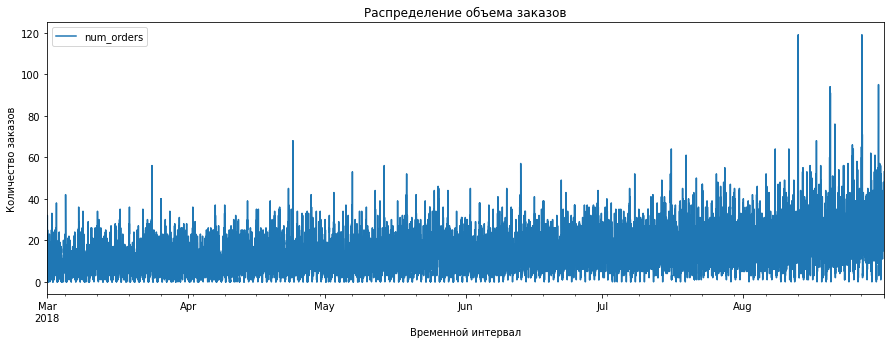

In [6]:
data.plot(title='Распределение объема заказов',xlabel='Временной интервал', ylabel='Количество заказов')

plt.show()

Проверим даты на соответствие хронологическому порядку

In [7]:
data.index.is_monotonic_increasing

True

### Вывод

Из датасета видно, что у нас есть данные по заказам такси за каждые сутки, начиная с 01.03.2018 по 31.08.2018 с разбивкой на каждые 10 минут. Данные сразу же приведены к необходимому для дальшейшего анализа формату - даты перенесены в индекс. Из датасета видно, что данные находятся в правильном хронологическом порядке.

## Анализ данных

Проведем анализ имеющихся данных.

Для начала сгруппируем данные не по 10 минут, а по часам.

In [8]:
# Ресемплинг даты от 10-минутного формата к часовому
data = data.resample('1H').sum()

In [9]:
#проверим выводом первых значений
data.head()

,num_orders
datetime,
2018-03-01 00:00:00,124
2018-03-01 01:00:00,85
2018-03-01 02:00:00,71
2018-03-01 03:00:00,66
2018-03-01 04:00:00,43


### Проанализируем данные разбив их на: тренд, сезонность и шум.

In [10]:
# Разбивка данных на тренд, сезонность и шум
decomposed = seasonal_decompose(data)

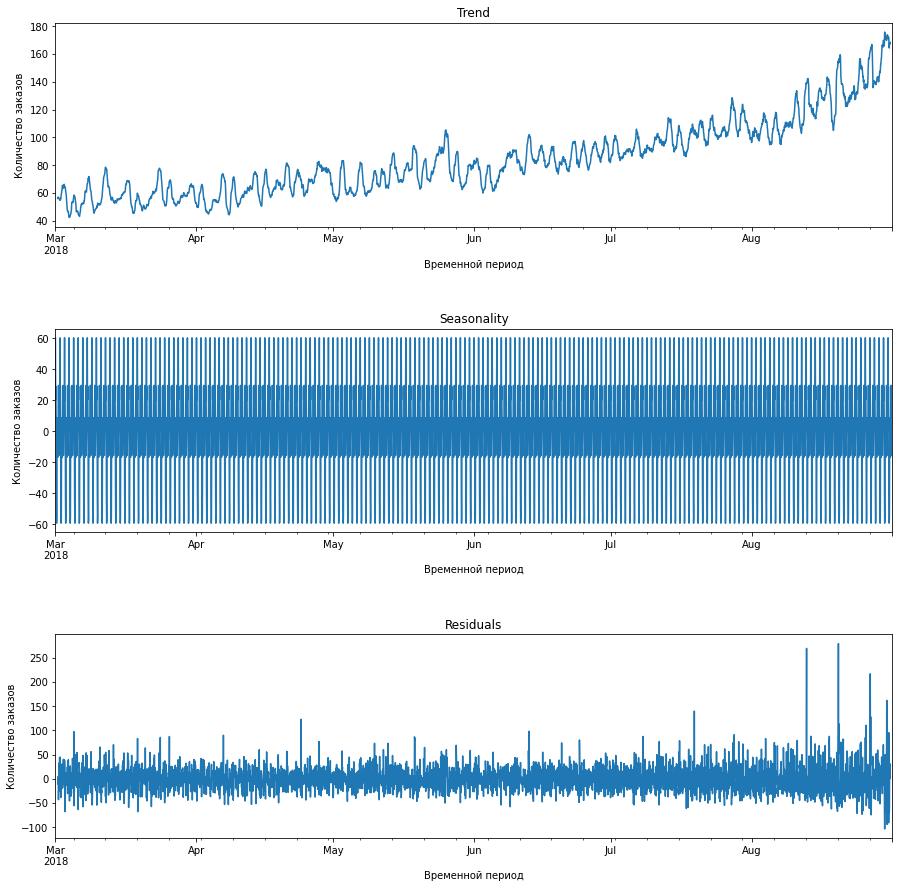

In [11]:
# Построение графиков тренда, сезонности и шума
plt.figure(figsize=(15, 15))
plt.subplots_adjust(wspace=0.5, hspace=0.5)

plt.subplot(311)
decomposed.trend.plot(ax=plt.gca(), xlabel='Временной период', ylabel='Количество заказов')
plt.title('Trend')


plt.subplot(312)
decomposed.seasonal.plot(ax=plt.gca(), xlabel='Временной период', ylabel='Количество заказов')
plt.title('Seasonality')

plt.subplot(313)
decomposed.resid.plot(ax=plt.gca(), xlabel='Временной период', ylabel='Количество заказов')
plt.title('Residuals');

**Вывод:** Из графиков видно, что у заказов такси есть восходящий тренд - количество заказов от месяца к месяцу растет. Из графика сезонности нельзя сказать о какой-то существующей сезонности заказов такси. 

Рассмотрим график сезонности поближе - в разрезе 5 дней. Видно, что существуют определенные стационырные суточные колебания в количестве заказов такси

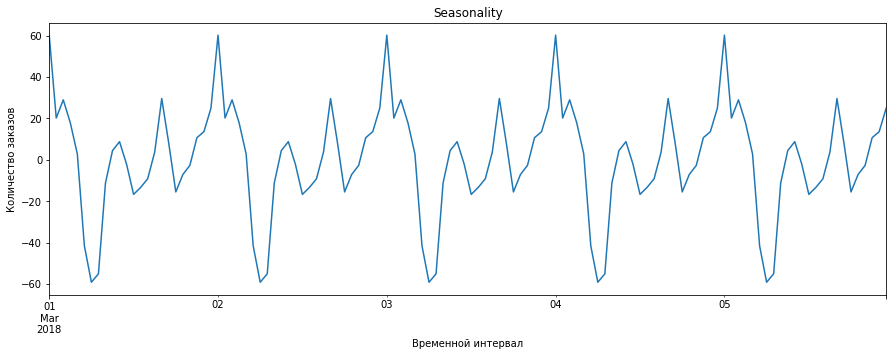

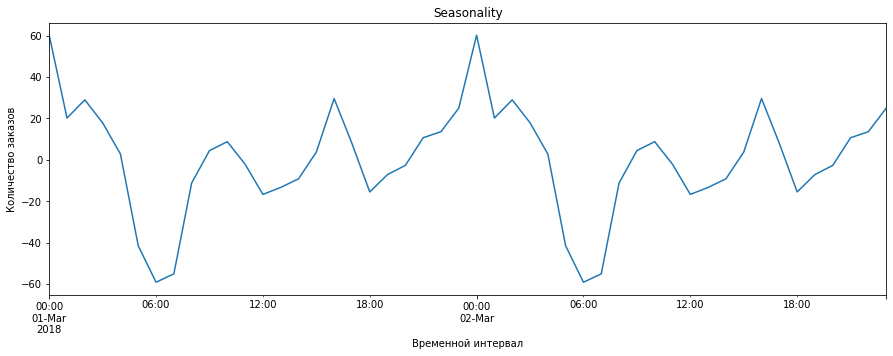

In [12]:
# Построение графика сезонности за 5 дней
plt.figure(figsize=(15, 5))
decomposed.seasonal['2018-03-01':'2018-03-05'].plot(ax=plt.gca(), xlabel='Временной интервал', ylabel='Количество заказов')
plt.title('Seasonality');

# Построение графика сезонности за 1 день
plt.figure(figsize=(15, 5))
decomposed.seasonal['2018-03-01':'2018-03-02'].plot(ax=plt.gca(), xlabel='Временной интервал', ylabel='Количество заказов')
plt.title('Seasonality');

**Вывод:** Для определения суточных колебаний рассмотрим `график дневного колебания`. Из него видно, что максимальная суточная активность приходится на ночное время, скорее всего это связано с тем, что городской транспорт заканчивает свою работу в ночное время. Минимальная суточная активность приходится на 6 часов утра, это может быть связано с началом работы общественного транспортра. 

В целях оценки стационарности ряда, добавим новую колонку `rolling_mean` со значением скользящего среднего и `std` - стандартное отклонение.

In [13]:
#Скользящее среднее
data['rolling_mean'] = data.shift().rolling(10).mean()
#Стандартное отклонение
data['std'] = data['num_orders'].shift().rolling(10).std()

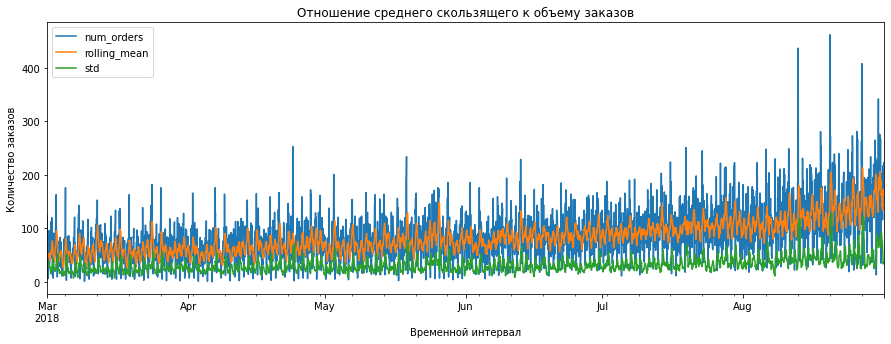

In [14]:
data.plot(title='Отношение среднего скользящего к объему заказов',xlabel='Временной интервал', ylabel='Количество заказов')

plt.show()

**Вывод:** Из полученного графика видно, что средннее значение постепенно возростает. Начиная с июня 2018 года изменение среднего особенно заментно. Учитывая что данные собраны о заказах такси в аэропортах, можно предположить что **количество заказов такси увеличивается в летний период за счет людей которые отправляются в отпуск**.

### Выполним расширенный тест Дики-Фуллера

Сформулируем нулевую и альтернативную гипотезу: 

`Н0` - Временной ряд является нестационарным.

`Н1` - Временной ряд является стационарным.
    
   

In [15]:
adfuller(data['num_orders'])

(-3.0689242890279558,
 0.028940051402612906,
 30,
 4385,
 {'1%': -3.431842162413052,
  '5%': -2.8621993540813637,
  '10%': -2.567120978470452},
 41728.71357827463)

`Статистика теста`: -3.068

`P-value`: 0.0289

**Вывод:** Поскольку значение p-value < 0.05 то мы можем отвергнуть нулевую гипотезу и сделать вывод, что временной ряд является стационарным

### Вывод 
Из проведенного анализа видно, что присутствует восходящий тренд по заказам такси от месяца к месяцу. Это может быть связано с различными факторами, такими как узнаваемость бренда комании "Чётенькое такси", увеличением пассажиро-потока в летний период за счёт сезона отпусков. Четко выраженная сезонность в заказах отсутствует. В суточных колебаниях выражен повышенный спрос на ночные поездки, с минимумом поездок приходящимся на 6 утра.

## Предобработка данных

Для того чтобы мы могли качественно обучить модель необходимо предобработать данные.

Для начала напишем функцию, которая создаст нам дополнительные фичи, которые помогут моделям обучаться.

In [16]:
# Фукнция для создания дополнительных фичей
def make_features(data, max_lag, rolling_mean_size):
    data['dayofweek'] = data.index.dayofweek
    
    for lag in range(1, max_lag + 1):
        data['lag_{}'.format(lag)] = data['num_orders'].shift(lag)
        
    data['rolling_mean'] = data['num_orders'].shift().rolling(rolling_mean_size).mean()

Передадим ей данные и необходимые значения

In [17]:
make_features(data, 50, 50)  # Создание дополнительных фичей

Разобьем данные на train и test выборки, после чего отделим признаки от целевого признака.

In [18]:
train, test = train_test_split(data,
                                shuffle=False,
                                test_size=0.25,
                              random_state=RANDOM_STATE)

train = train.dropna()

In [19]:
# Разбивка на признаки и целевой признак
features_train = train.drop('num_orders', axis=1)
features_test = test.drop('num_orders', axis=1)
target_train = train['num_orders']
target_test = test['num_orders']

display(features_train.shape)
display(target_train.shape)
display(features_test.shape)
display(target_test.shape)

(3262, 53)

(3262,)

(1104, 53)

(1104,)

### Вывод: 
Данные разделенны, и добавлены 50 новых признаков по которым модели будет обучаться 

## Построение моделей обучения

Обучим различные модели и изучим их метрики.

### LinearRegression


In [20]:
# Инициализаруем модель.
model_LR = LinearRegression()

# Определим схему разделения временного ряда
tscv_LR = TimeSeriesSplit(n_splits=3)

# Запишем гиперпараметры для модели
param_grid_LR = {}


#Выполним кросс-валидацию
rs_LR = RandomizedSearchCV(model_LR, 
                            param_grid_LR, 
                            cv=tscv_LR, 
                            n_iter=5, 
                            random_state=RANDOM_STATE, 
                            scoring='neg_mean_squared_error')

rs_LR.fit(features_train, target_train)

#Находим RMSE
rmse_valid_LR = (rs_LR.best_score_ * (-1)) ** 0.5


#Выводим на экран
display(f'Valid RMSE: {rmse_valid_LR}')
display(f'best_params_:' , rs_LR.best_params_)

/opt/conda/lib/python3.9/site-packages/sklearn/model_selection/_search.py:285: UserWarning: The total space of parameters 1 is smaller than n_iter=5. Running 1 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(


'Valid RMSE: 23.467255247103353'

'best_params_:'

{}

### LGBMRegressor

In [21]:
# Инициализаруем модель.
model_LGBM = LGBMRegressor(random_state=RANDOM_STATE)

# Определим схему разделения временного ряда
tscv_LGBM = TimeSeriesSplit(n_splits=3)

# Запишем гиперпараметры для модели
param_grid_LGBM = {
    'n_estimators': np.arange(100, 500, 100),
    'learning_rate': np.arange(0.01, 0.05, 0.1),
    'max_depth': np.arange(1, 8, 1)}


#Выполним кросс-валидацию
rs_LGBM = RandomizedSearchCV(model_LGBM, 
                            param_grid_LGBM, 
                            cv=tscv_LGBM, 
                            n_iter=5, 
                            random_state=RANDOM_STATE, 
                            scoring='neg_mean_squared_error')

rs_LGBM.fit(features_train, target_train)

#Находим RMSE
rmse_valid_LGBM = (rs_LGBM.best_score_ * (-1)) ** 0.5

#Выводим на экран
display(f'Valid RMSE: {rmse_valid_LGBM}')
display(f'best_params_:' , rs_LGBM.best_params_)

'Valid RMSE: 23.41412103471143'

'best_params_:'

{'n_estimators': 400, 'max_depth': 6, 'learning_rate': 0.01}

### CatboostRegressor

In [22]:
# Инициализаруем модель.
model_CB1 = CatBoostRegressor(random_state=RANDOM_STATE)

# Определим схему разделения временного ряда
tscv_CB1 = TimeSeriesSplit(n_splits=3)

# Запишем гиперпараметры для модели
param_grid_CB1 = {
    'iterations': np.arange(100, 500, 100),
    'learning_rate': np.arange(0.01, 0.05, 0.1),
    'depth': np.arange(1, 8, 1)}


#Выполним кросс-валидацию
rs_CB1 = RandomizedSearchCV(model_CB1, 
                            param_grid_CB1, 
                            cv=tscv_CB1, 
                            n_iter=11, 
                            random_state=RANDOM_STATE, 
                            scoring='neg_mean_squared_error')

rs_CB1.fit(features_train, target_train)


#Находим RMSE
rmse_valid_CB1 = (rs_CB1.best_score_ * (-1)) ** 0.5


#Выводим на экран
display(f'Valid RMSE: {rmse_valid_CB1}')
display(f'best_params_:' , rs_CB1.best_params_)

0:	learn: 28.7107286	total: 58.6ms	remaining: 5.8s
1:	learn: 28.5854846	total: 65.9ms	remaining: 3.23s
2:	learn: 28.4586312	total: 73.2ms	remaining: 2.37s
3:	learn: 28.3453644	total: 80.6ms	remaining: 1.93s
4:	learn: 28.2299119	total: 87.9ms	remaining: 1.67s
5:	learn: 28.1052366	total: 95.3ms	remaining: 1.49s
6:	learn: 27.9817771	total: 103ms	remaining: 1.36s
7:	learn: 27.8598068	total: 110ms	remaining: 1.26s
8:	learn: 27.7551708	total: 117ms	remaining: 1.19s
9:	learn: 27.6469405	total: 125ms	remaining: 1.13s
10:	learn: 27.5414388	total: 133ms	remaining: 1.07s
11:	learn: 27.4232512	total: 140ms	remaining: 1.03s
12:	learn: 27.3091448	total: 148ms	remaining: 991ms
13:	learn: 27.1965684	total: 155ms	remaining: 954ms
14:	learn: 27.0965661	total: 163ms	remaining: 921ms
15:	learn: 26.9868358	total: 170ms	remaining: 891ms
16:	learn: 26.8752131	total: 177ms	remaining: 866ms
17:	learn: 26.7609890	total: 185ms	remaining: 842ms
18:	learn: 26.6451792	total: 192ms	remaining: 819ms
19:	learn: 26.533

'Valid RMSE: 23.92766516788291'

'best_params_:'

{'learning_rate': 0.01, 'iterations': 400, 'depth': 6}

In [23]:
# создадим таблицу, чтобы визуализировать разницу моделей

result = {
    'model': ['linear_regression', 'LGBMRegressor', 'CatboostRegressor'],
    'rmse_valid': [rmse_valid_LR, rmse_valid_LGBM, rmse_valid_CB1]}

models = pd.DataFrame(result)

In [24]:
# оценим итоговый результат

models.set_index('model')

,rmse_valid
model,
linear_regression,23.467255
LGBMRegressor,23.414121
CatboostRegressor,23.927665


### Вывод:  
Под главный критерий задачи подходят все модели, но лучше всего справился `LGBMRegressor` с результатом: `23.414121` на валидационной выборке, её и будем тестировать.

## Тестирование LGBMRegressor 

In [25]:
predict_test_LGBM = rs_LGBM.predict(features_test)

rmse_test_LGBM = mean_squared_error(target_test, predict_test_LGBM) ** .5


display(f'Test RMSE: {rmse_test_LGBM}')

'Test RMSE: 40.814146435881646'

RMSE на тестовой выборке отвечает главному критерию задачи — `целевая метрика RMSE` на тесте должна быть меньше **48**.

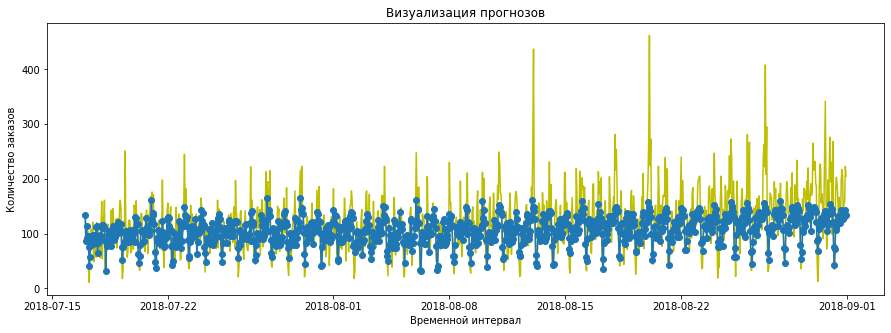

In [26]:
# Построим график с наложением прогноза модели на ключевой признак
plt.figure(figsize=(15, 5))
plt.plot(target_test.index,
         target_test,
         'y-',
         target_test.index,
         predict_test_LGBM,
         'o-')
ax = plt.gca()
ax.set_title("Визуализация прогнозов")
ax.set_xlabel("Временной интервал")
ax.set_ylabel("Количество заказов");

### Вывод:
Лучшая модель на тестовой выборке показала - `RMSE`: **40.81**

Из графика видно, что прогнозы модели сконцентрированы в диапазоне значений от 50-150. Модель ошибается сильнее когда значения Целевого признака выходят за границы диапазона 150 и выше. 

### Вывод:

Значение целевой метрики `RMSE` на тестовой выборке **> 48** - Достигнуто. Модель `LGBMRegression` показывает погрешность в **40.81**.

## Проверка лучшей модели на "адекватность"

Обучим модель `DummyRegressor`на валидационной выборке, чтобы оценить её качество и сравнить результат с результатом лучшей модели. Чтобы убедиться что она работает хорошо.

In [27]:
# Инициализаруем модель.
dummy_regr = DummyRegressor(strategy="mean")

# Определим схему разделения временного ряда
tscv_dummy = TimeSeriesSplit(n_splits=3)

# Запишем гиперпараметры для модели
param_grid_dummy = {}


#Выполним кросс-валидацию
rs_dummy = RandomizedSearchCV(dummy_regr, 
                            param_grid_dummy, 
                            cv=tscv_dummy, 
                            n_iter=5, 
                            random_state=RANDOM_STATE, 
                            scoring='neg_mean_squared_error')

rs_dummy.fit(features_train, target_train)

#Находим RMSE
rmse_valid_dummy = (rs_dummy.best_score_ * (-1)) ** 0.5

#Выводим на экран
display(f'Valid RMSE: {rmse_valid_dummy}')
display(f'best_params_:' , rs_dummy.best_params_)

/opt/conda/lib/python3.9/site-packages/sklearn/model_selection/_search.py:285: UserWarning: The total space of parameters 1 is smaller than n_iter=5. Running 1 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(


'Valid RMSE: 37.7698973993219'

'best_params_:'

{}

### Вывод:
`DummyRegressor` на валидационной выборке `Valid RMSE`: **37.76**

Качество `DummyRegressor` на валидационной выборке значительно хуже чем у модели `LGBMRegressor`.

## Итоговый вывод:

Мы исследовали и построили модели для прогнозирования количества заказов такси на ближайший час для компании "Чётенькое такси". Данные демонстрируют тенденцию к увеличению числа заказов. Сезонность выявить сложно из-за ограниченного объема данных. Однако при рассмотрении данных за сутки можно заметить суточные колебания числа заказов, которые достигают пика в ночное и вечернее время и минимума в утренние часы. Суточные колебания примерно одинаковы каждый день.
Мы провели предобработку данных и обучили три модели – `LinearRegression`, `LGBMRegressor` и `CatBoostRegressor`. В результате лучше всего себя показала модель `LGBMRegression` с прогнозируемым отклонением по RMSE 23.41 заказа в час.

Проверка `LGBMRegression` на тестовых данных показала ухудшение показателя `RMSE`, но он остается в приемлимом диапазоне, для этой работы `(RMSE<48)`, и составляет отклонение на **40.81 заказа в час**.